## Titanic - Machine Learning from Disaster
#### Summer 2025 EDA Project @hoangvd12



### 1. Import data

In [48]:
# first, we'll import the libs
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [49]:
# then load the file in ./data
train = pd.read_csv("./data/Titanic-Dataset.csv", index_col="PassengerId") 

In [50]:
# check
train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


SibSP: siblings or spouses aboard the Titanic 

Parch: parents or children aboard the Titanic 

Embarked: port of embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)



In [51]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


2 types: 
Categorical: survived, pclass, sex, sibsp, parch, embarked
Numberical: age, fare

In [52]:
categorical_cols = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Embarked']
for col in categorical_cols:
    train[col] = train[col].astype('category')

In [53]:
train.describe()

,Age,Fare
count,714.000000,891.000000
mean,29.699118,32.204208
std,14.526497,49.693429
min,0.420000,0.000000
25%,20.125000,7.910400
50%,28.000000,14.454200
75%,38.000000,31.000000
max,80.000000,512.329200


In [54]:
train.describe(include="category")

,Survived,Pclass,Sex,SibSp,Parch,Embarked
count,891,891,891,891,891,889
unique,2,3,2,7,7,3
top,0,3,male,0,0,S
freq,549,491,577,608,678,644


### 2. Exploratory Data Analysis

#### Categorical

#### Target variable: `Survival`

In [55]:
train['Survived'].value_counts().to_frame()

,count
Survived,
0,549
1,342


In [56]:
train['Survived'].value_counts(normalize=True).to_frame()

,proportion
Survived,
0,0.616162
1,0.383838


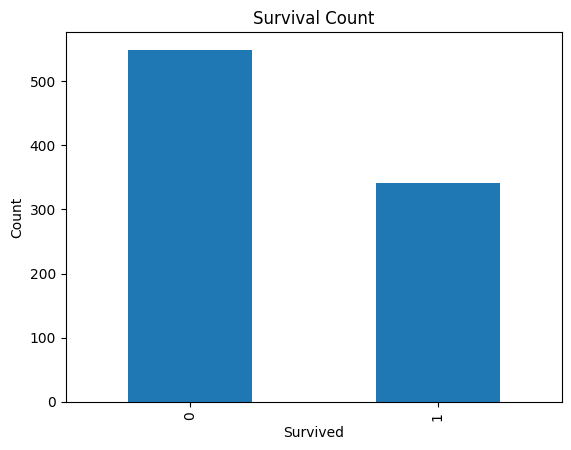

In [57]:
train['Survived'].value_counts().plot(kind='bar', title='Survival Count')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.show()

#### `Sex`

In [58]:
train['Sex'].value_counts().to_frame()

,count
Sex,
male,577
female,314


In [59]:
train['Sex'].value_counts(normalize=True).to_frame()

,proportion
Sex,
male,0.647587
female,0.352413


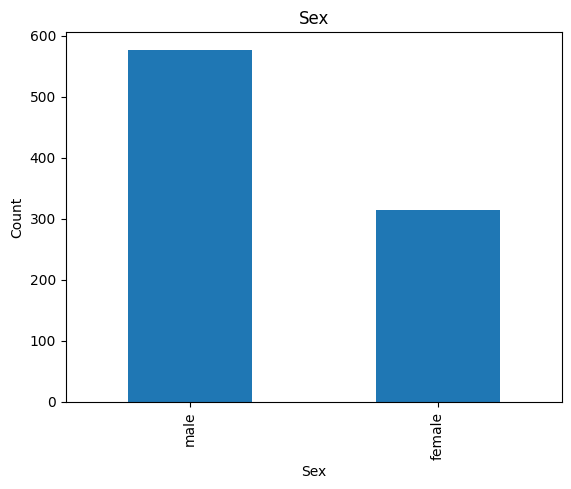

In [60]:
train['Sex'].value_counts().plot(kind='bar', title='Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

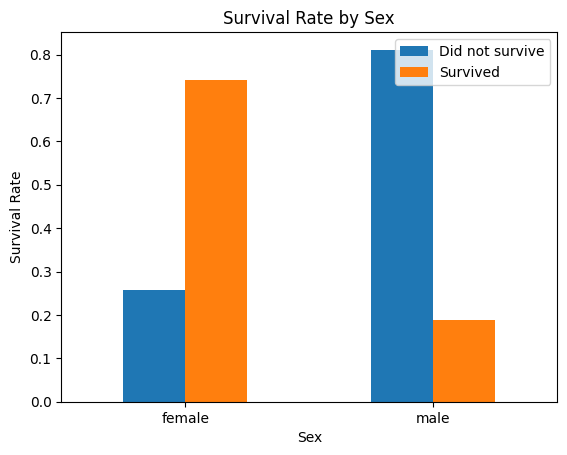

In [61]:
survival_by_sex = pd.crosstab(train['Sex'], train['Survived'], normalize='index')
survival_by_sex.plot(kind='bar', title='Survival Rate by Sex')
plt.xlabel('Sex')
plt.ylabel('Survival Rate')
plt.legend(['Did not survive', 'Survived'])
plt.xticks(rotation=0)
plt.show()

In [62]:
print("Survival rate by sex:")
print(survival_by_sex)

Survival rate by sex:
Survived         0         1
Sex                         
female    0.257962  0.742038
male      0.811092  0.188908


##### => Female passengers had approximately *4 times* higher survival rate compared to male passengers

#### Analysis of remaining categorical variables

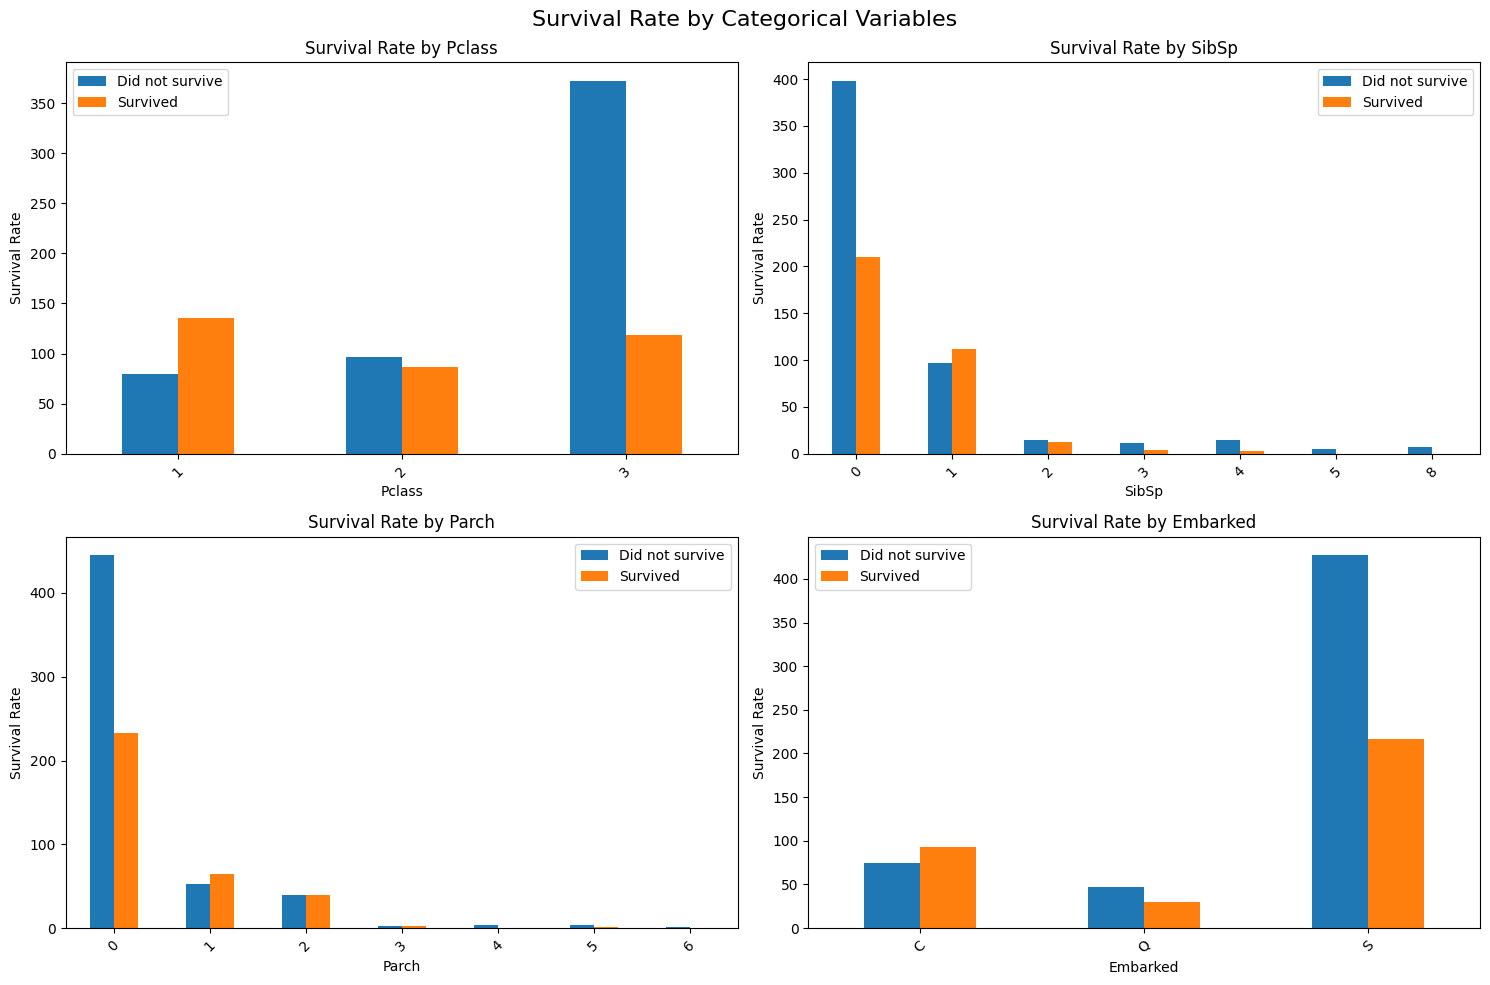

In [63]:
categorical_vars = ['Pclass', 'SibSp', 'Parch', 'Embarked']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Survival Rate by Categorical Variables', fontsize=16)

axes = axes.flatten()

for i, var in enumerate(categorical_vars):
    survival_by_var = pd.crosstab(train[var], train['Survived'])
    survival_by_var.plot(kind='bar', ax=axes[i], title=f'Survival Rate by {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Survival Rate')
    axes[i].legend(['Did not survive', 'Survived'])
    axes[i].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

#### Key Observations from Categorical Variable Analysis

##### Gender Impact
- **Female passengers had approximately 4 times higher survival rate** compared to male passengers (74.2% vs 18.9%)

##### Passenger Class Effect  
- **First class passengers had the highest survival rate**, followed by second class, then third class
- Clear correlation between socioeconomic status and survival probability

##### Family Size Patterns
- **Traveling alone (no siblings/spouses) resulted in higher mortality rates**
- **Traveling with 1-2 family members showed improved survival rates**
- **Having 1 companion appeared to provide the optimal survival advantage**

##### Parental Accompaniment
- **Passengers without parents/children had lower survival rates**
- **Those traveling with family members had better survival outcomes**

##### Port of Embarkation
- **Southampton (S) showed the highest mortality rates**
- **Cherbourg (C) had the lowest death rates among the three ports**

### EDA with numberical

1. By Age


In [64]:
print(train['Age'].describe())
print(train['Fare'].describe())

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64
count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


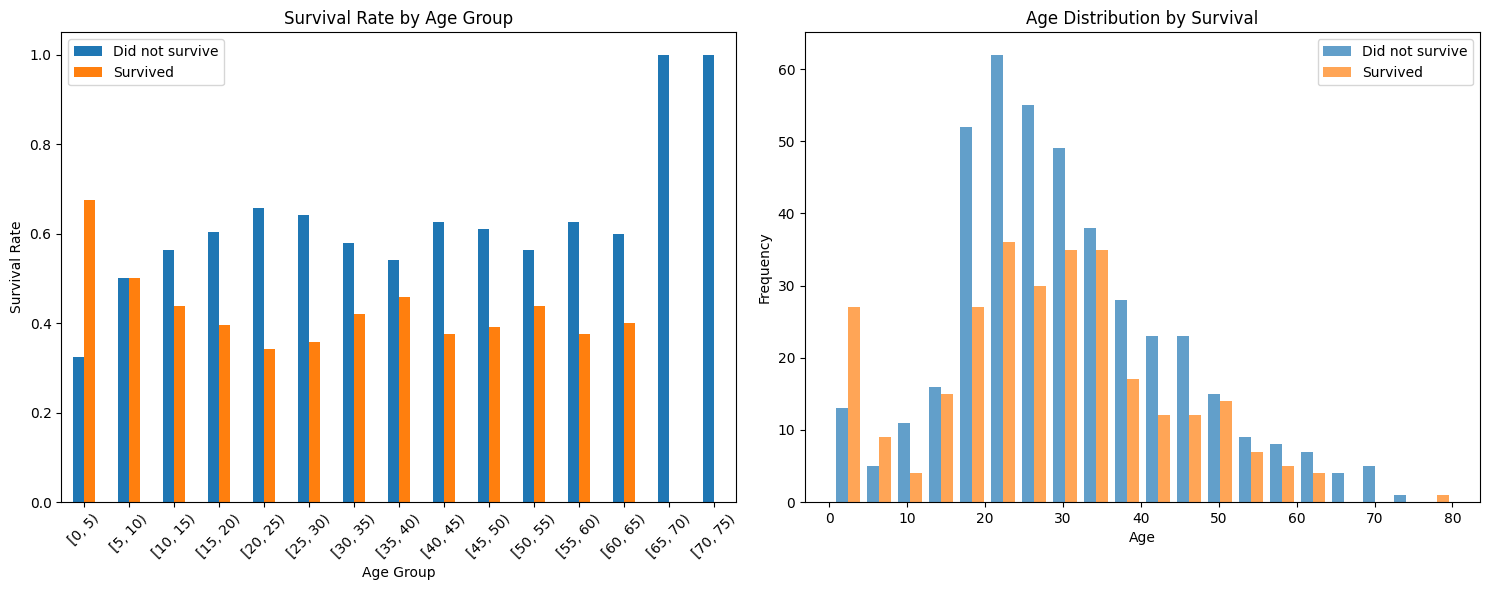

Survival rates by age group:
Survived          0         1
Age_Group                    
[0, 5)     0.325000  0.675000
[5, 10)    0.500000  0.500000
[10, 15)   0.562500  0.437500
[15, 20)   0.604651  0.395349
[20, 25)   0.657895  0.342105
[25, 30)   0.641509  0.358491
[30, 35)   0.578947  0.421053
[35, 40)   0.541667  0.458333
[40, 45)   0.625000  0.375000
[45, 50)   0.609756  0.390244
[50, 55)   0.562500  0.437500
[55, 60)   0.625000  0.375000
[60, 65)   0.600000  0.400000
[65, 70)   1.000000  0.000000
[70, 75)   1.000000  0.000000


In [65]:
# Create age groups and analyze survival rates by age
age_bins = np.arange(0, 81, 5)
train['Age_Group'] = pd.cut(train['Age'], bins=age_bins, right=False)

# Calculate survival rates by age group
survival_by_age = pd.crosstab(train['Age_Group'], train['Survived'], normalize='index')

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Survival rate by age group
survival_by_age.plot(kind='bar', ax=ax1, title='Survival Rate by Age Group')
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Survival Rate')
ax1.legend(['Did not survive', 'Survived'])
ax1.tick_params(axis='x', rotation=45)

# Plot 2: Age distribution by survival status
survived = train[train['Survived'] == 1]['Age'].dropna()
not_survived = train[train['Survived'] == 0]['Age'].dropna()

ax2.hist([not_survived, survived], bins=20, alpha=0.7, label=['Did not survive', 'Survived'])
ax2.set_xlabel('Age')
ax2.set_ylabel('Frequency')
ax2.set_title('Age Distribution by Survival')
ax2.legend()

plt.tight_layout()
plt.show()

# Print survival rates by age group
print("Survival rates by age group:")
print(survival_by_age)


- **Children (0-5 years): 67.5% survival rate** - Highest survival rate among all age groups
- **Young adults (20-30 years): ~34-36% survival rate** - Lower survival rates during prime working age
- **Elderly passengers (65+ years): 0% survival rate** - Complete mortality in oldest age groups


2. Fare

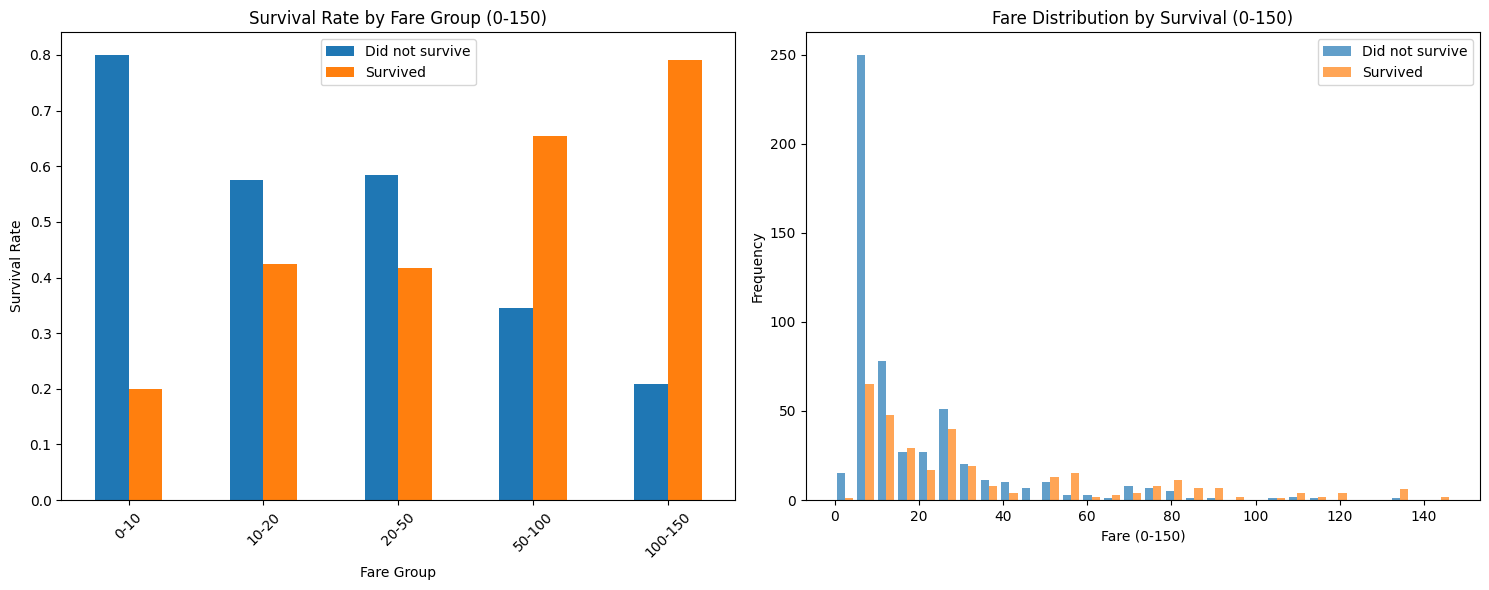

Survival rates by fare group (0-150):
Survived           0         1
Fare_Group                    
0-10        0.800595  0.199405
10-20       0.575419  0.424581
20-50       0.583333  0.416667
50-100      0.345794  0.654206
100-150     0.208333  0.791667


In [66]:

fare_subset = train[train['Fare'] <= 150].copy()

fare_bins = [0, 10, 20, 50, 100, 150]
fare_labels = ['0-10', '10-20', '20-50', '50-100', '100-150']
fare_subset['Fare_Group'] = pd.cut(fare_subset['Fare'], bins=fare_bins, labels=fare_labels, include_lowest=True)

survival_by_fare_subset = pd.crosstab(fare_subset['Fare_Group'], fare_subset['Survived'], normalize='index')

# Create visualizations
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

survival_by_fare_subset.plot(kind='bar', ax=ax1, title='Survival Rate by Fare Group (0-150)')
ax1.set_xlabel('Fare Group')
ax1.set_ylabel('Survival Rate')
ax1.legend(['Did not survive', 'Survived'])
ax1.tick_params(axis='x', rotation=45)

survived_fare_subset = fare_subset[fare_subset['Survived'] == 1]['Fare']
not_survived_fare_subset = fare_subset[fare_subset['Survived'] == 0]['Fare']

ax2.hist([not_survived_fare_subset, survived_fare_subset], bins=30, alpha=0.7, label=['Did not survive', 'Survived'])
ax2.set_xlabel('Fare (0-150)')
ax2.set_ylabel('Frequency')
ax2.set_title('Fare Distribution by Survival (0-150)')
ax2.legend()

plt.tight_layout()
plt.show()

print("Survival rates by fare group (0-150):")
print(survival_by_fare_subset)

##### Fare matters :)

/tmp/ipykernel_31475/3220312929.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  survival_matrix = train.groupby(['Sex', 'Pclass'])['Survived'].apply(lambda x: x.astype(int).mean()).unstack()


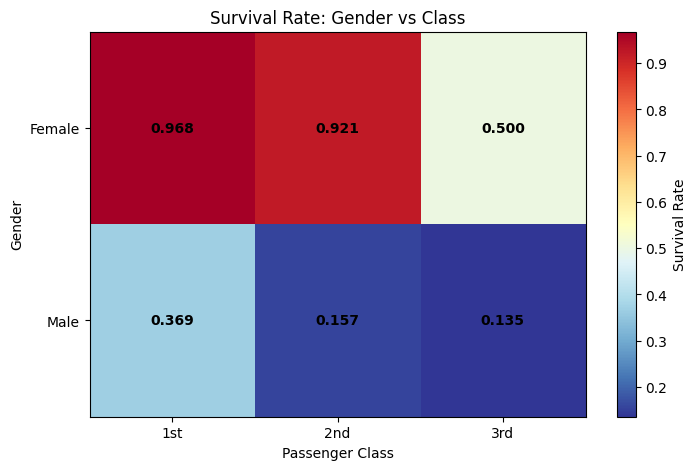

Pclass      1      2      3
Sex                        
female  0.968  0.921  0.500
male    0.369  0.157  0.135


In [67]:
survival_matrix = train.groupby(['Sex', 'Pclass'])['Survived'].apply(lambda x: x.astype(int).mean()).unstack()

# Create heatmap
plt.figure(figsize=(8, 5))
im = plt.imshow(survival_matrix, cmap='RdYlBu_r', aspect='auto')

# Add value annotations
for i in range(len(survival_matrix.index)):
    for j in range(len(survival_matrix.columns)):
        plt.text(j, i, f'{survival_matrix.iloc[i, j]:.3f}', 
                ha='center', va='center', fontweight='bold')

plt.colorbar(im, label='Survival Rate')
plt.title('Survival Rate: Gender vs Class')
plt.xlabel('Passenger Class')
plt.ylabel('Gender')
plt.xticks(range(3), ['1st', '2nd', '3rd'])
plt.yticks(range(2), ['Female', 'Male'])
plt.show()

print(survival_matrix.round(3))

*Gender is the strongest predictor of survival (But even wealthy men had worse odds than poor women)*


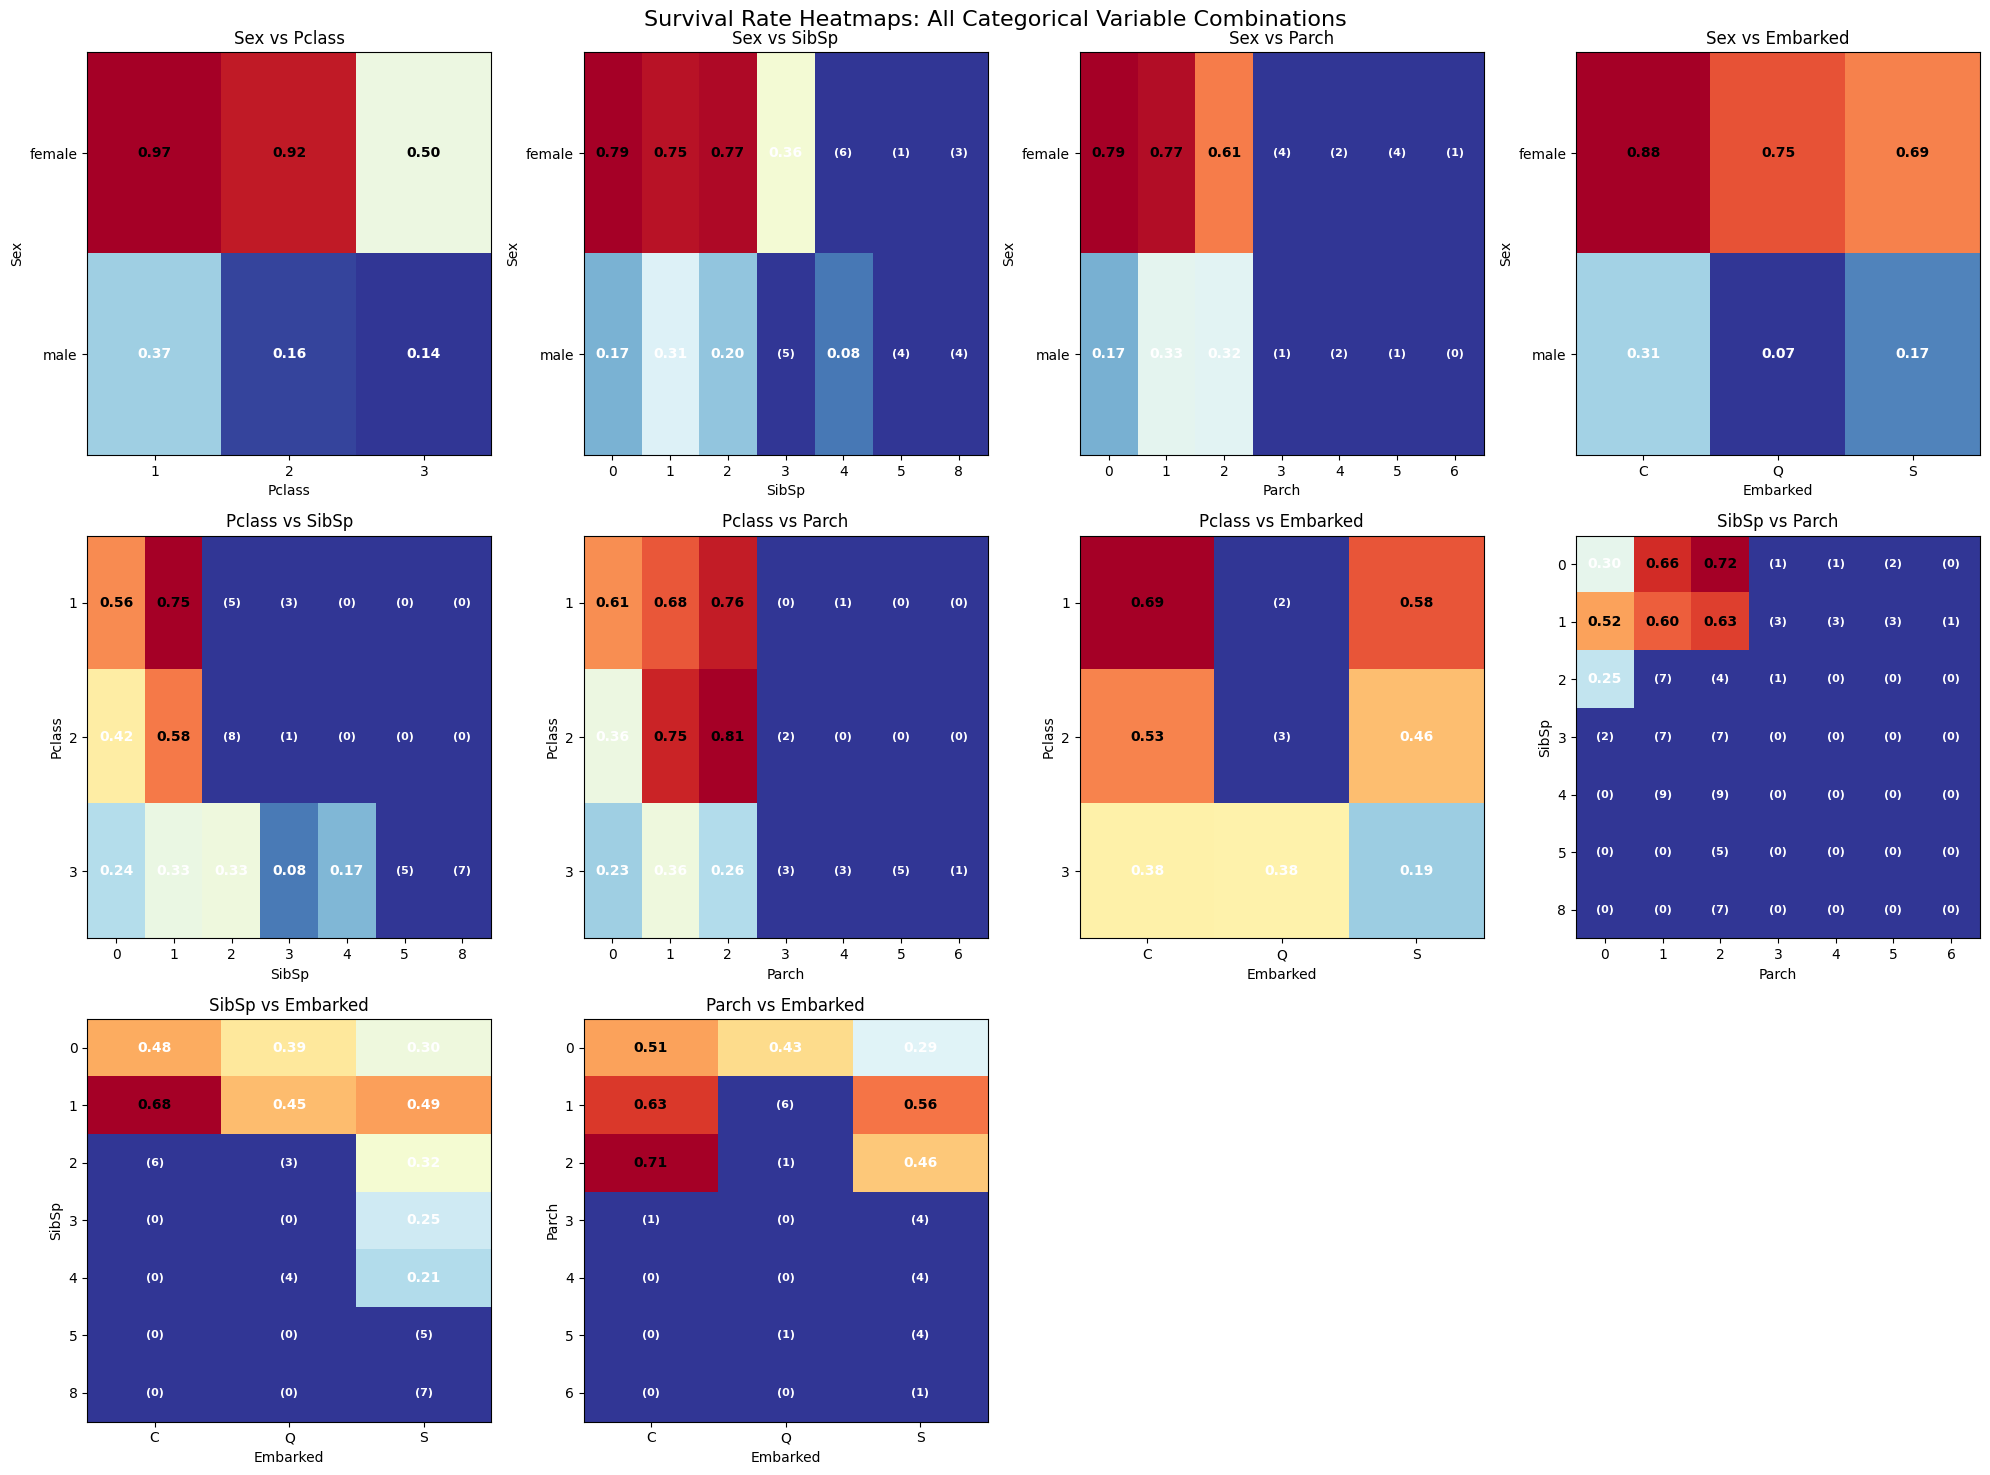

In [72]:
categorical_vars = ['Sex', 'Pclass', 'SibSp', 'Parch', 'Embarked']
num_combinations = sum(1 for i in range(len(categorical_vars)) for j in range(i+1, len(categorical_vars)))

if num_combinations <= 9:
    rows, cols = 3, 4
else:
    rows = int(np.ceil(num_combinations / 4))
    cols = 4

fig, axes = plt.subplots(rows, cols, figsize=(20, 5*rows))
fig.suptitle('Survival Rate Heatmaps: All Categorical Variable Combinations', fontsize=16)

axes = axes.flatten()
plot_idx = 0

for i in range(len(categorical_vars)):
    for j in range(i+1, len(categorical_vars)):
        var1, var2 = categorical_vars[i], categorical_vars[j]
        
        count_matrix = pd.crosstab(train[var1], train[var2])
        
        survival_matrix = train.groupby([var1, var2], observed=True)['Survived'].apply(lambda x: x.astype(int).mean()).unstack(fill_value=0)
        
        for row in range(len(survival_matrix.index)):
            for col in range(len(survival_matrix.columns)):
                if count_matrix.iloc[row, col] < 10:
                    survival_matrix.iloc[row, col] = 0.0
        
        im = axes[plot_idx].imshow(survival_matrix, cmap='RdYlBu_r', aspect='auto')
        
        for row in range(len(survival_matrix.index)):
            for col in range(len(survival_matrix.columns)):
                value = survival_matrix.iloc[row, col]
                count = count_matrix.iloc[row, col]
                
                if count >= 10:  
                    axes[plot_idx].text(col, row, f'{value:.2f}', 
                                       ha='center', va='center', fontweight='bold',
                                       color='white' if value < 0.5 else 'black')
                else: 
                    axes[plot_idx].text(col, row, f'({count})', 
                                       ha='center', va='center', fontweight='bold',
                                       color='white', fontsize=8)
        
        axes[plot_idx].set_title(f'{var1} vs {var2}')
        axes[plot_idx].set_xlabel(var2)
        axes[plot_idx].set_ylabel(var1)
        axes[plot_idx].set_xticks(range(len(survival_matrix.columns)))
        axes[plot_idx].set_xticklabels(survival_matrix.columns)
        axes[plot_idx].set_yticks(range(len(survival_matrix.index)))
        axes[plot_idx].set_yticklabels(survival_matrix.index)
        
        plot_idx += 1

for idx in range(plot_idx, len(axes)):
    axes[idx].set_visible(False)

plt.tight_layout()
plt.show()


##### How to Live Long and Prosper on the Titanic

**Option 1: Be a Woman**
- Be a woman in 1st or 2nd class
- Be a woman traveling with 1-3 family members 

**Option 2: Go First Class**
- Book 1st or 2nd class tickets (money talks xD )
- Travel with 0-2 family members (small families = happy families = surviving families :) )


# EDA Results

## Demographic Insights
* Women had significantly higher survival rates than men (74% vs 19%)
* Children (especially under 10) survived at higher rates than adults
* First class passengers had highest survival (63%), followed by Second class (47%), Third class lowest (24%)

## Family Insights
* Solo travelers had lower survival rates than those with family
* Small families (1-3 members) had best survival odds
* Large families (>4 members) showed significantly decreased survival

## Economic Insights
* Higher ticket prices correlated with higher survival rates
* Passengers who paid more had priority access to lifeboats

## Key Conclusions
* Most important survival factors: Gender, Age, and Ticket Class
* "Women and children first" principle was applied
* Social and economic status played crucial